In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,208.519,220.315,199.020,0.00609,0.000030,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
1,179.711,225.930,144.878,0.00709,0.000040,0.00391,0.00419,0.01172,0.04313,0.442,...,0.03455,0.06892,0.07223,11.866,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
2,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.00726,0.01403,0.00065,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
3,174.688,240.005,74.287,0.01360,0.000080,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
4,110.453,127.611,105.554,0.00494,0.000040,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
5,115.380,123.109,108.634,0.00332,0.000030,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
6,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
7,171.041,208.313,75.501,0.00455,0.000030,0.00250,0.00234,0.00750,0.01966,0.186,...,0.01872,0.02666,0.01095,25.908,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
8,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
9,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399


,status
0,1
1,1
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
1,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.05174,0.09669,0.11843,15.060,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
2,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
3,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,...,0.01491,0.02460,0.01397,23.958,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,222.236,231.345,205.495,0.00266,0.00001,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
172,240.301,245.135,219.783,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,0.212,...,0.01344,0.03529,0.00965,21.020,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
173,115.322,135.738,107.802,0.00619,0.00005,0.00352,0.00329,0.01057,0.03273,0.325,...,0.02931,0.04933,0.02810,19.388,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
174,126.344,134.231,112.773,0.00448,0.00004,0.00131,0.00169,0.00393,0.02033,0.185,...,0.01614,0.03429,0.00474,25.030,0.507504,0.760361,-6.689151,0.291954,2.431854,0.105993


,status
0,0
1,1
2,0
3,0
4,0
...,...
171,0
172,0
173,1
174,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,110.417,131.067,103.370,0.00784,0.000070,0.00352,0.00514,0.01056,0.03715,0.334,...,0.02802,0.06097,0.00969,21.422,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
1,116.848,217.552,99.503,0.00531,0.000050,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
2,95.385,102.145,90.264,0.00608,0.000060,0.00331,0.00332,0.00994,0.03202,0.263,...,0.02455,0.05408,0.01062,21.875,0.644954,0.779612,-5.115212,0.249494,2.017753,0.260015
3,240.301,245.135,219.783,0.00517,0.000020,0.00316,0.00283,0.00949,0.02018,0.212,...,0.01344,0.03529,0.00965,21.020,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
4,122.188,128.611,115.765,0.00524,0.000040,0.00169,0.00203,0.00507,0.01613,0.143,...,0.01433,0.02566,0.00839,23.162,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
5,115.380,123.109,108.634,0.00332,0.000030,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
6,128.940,479.697,88.251,0.00581,0.000050,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
7,116.848,217.552,99.503,0.00531,0.000050,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
8,114.847,271.314,104.680,0.00867,0.000080,0.00373,0.00520,0.01120,0.03225,0.350,...,0.02519,0.05414,0.01143,21.660,0.547975,0.817396,-4.609161,0.221711,1.831691,0.316395
9,183.520,216.814,161.340,0.01466,0.000080,0.00849,0.00819,0.02546,0.06050,0.618,...,0.06359,0.08595,0.06057,14.367,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085


,status
0,1
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,1
9,1


In [3]:
#use the Isolation Forest model to search for anomalies
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

clf.fit(train_X)

# create a column for the predictions
df['anomaly_score'] = clf.decision_function(train_X)
df['outlier'] = clf.predict(train_X)
anomaly_test = clf.decision_function(test_X)
anomalies_test = anomaly_test < anomaly_threshold
anomaly_val = clf.decision_function(val_X)
anomalies_val = anomaly_val < anomaly_threshold
train_out = df.loc[df['outlier']==-1].index


# show the number of outliers
print(df['outlier'].value_counts())
print(anomalies_test)
print(anomalies_val)
display(df.loc[df['outlier']==-1])

# Remove the outliers from the data
X_train_no_outliers = np.delete(train_X, train_out, axis=0)
y_train_no_outliers = np.delete(train_y, train_out)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
73,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.043991,-1
151,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,1,-0.032702,-1


In [4]:
train_X = train_X.values
#train_X = train_X.to_numpy()

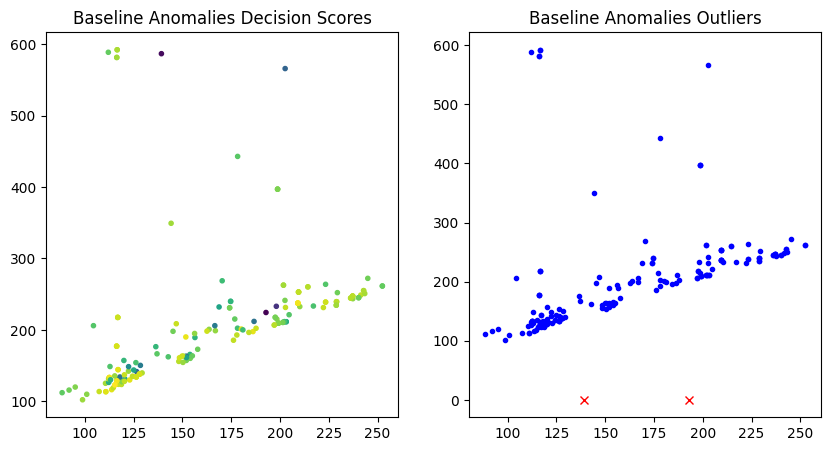

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.295097,-1.0,-0.043991
1,1.0,0.112704,-1.0,-0.032702


In [5]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

clf.fit(train_X)
predictions_X = clf.predict(train_X)

ax1.scatter(train_X[:, 0], train_X[:, 1], c=clf.decision_function(train_X), marker='.')
ax1.set_title('Baseline Anomalies Decision Scores')
ax2.plot(train_X[predictions_X==1][:,0], train_X[predictions_X==1][:,1], 'b.')
ax2.plot(train_X[predictions_X==-1][:,0], train_X[predictions_X==-1][:,-1], 'rx')
ax2.set_title('Baseline Anomalies Outliers')
plt.show()

df = pd.DataFrame(dict(predicted_label=clf.predict(train_X), score=clf.decision_function(train_X)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
base_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(base_scores)

## Experimenting with Baseline data Outliers Intact

### Experimenting with PCA - Baseline

Component 1: Explained Variance 0.7061996636642656
Component 2: Explained Variance 0.9400615202271012
Component 3: Explained Variance 0.9987506167714876
Component 4: Explained Variance 0.9999642002527823
Component 5: Explained Variance 0.9999936811188789
Component 6: Explained Variance 0.9999982518561997
Component 7: Explained Variance 0.9999991258743216
Component 8: Explained Variance 0.9999996312901721
Component 9: Explained Variance 0.9999998620098413
Component 10: Explained Variance 0.9999999441923978
Component 11: Explained Variance 0.9999999741637072
Component 12: Explained Variance 0.9999999951199826
Component 13: Explained Variance 0.9999999985942317
Component 14: Explained Variance 0.9999999994116068
Component 15: Explained Variance 0.999999999802986
Component 16: Explained Variance 0.9999999999578315
Component 17: Explained Variance 0.999999999982106
Component 18: Explained Variance 0.999999999996755
Component 19: Explained Variance 0.9999999999999977
Component 20: Explained 

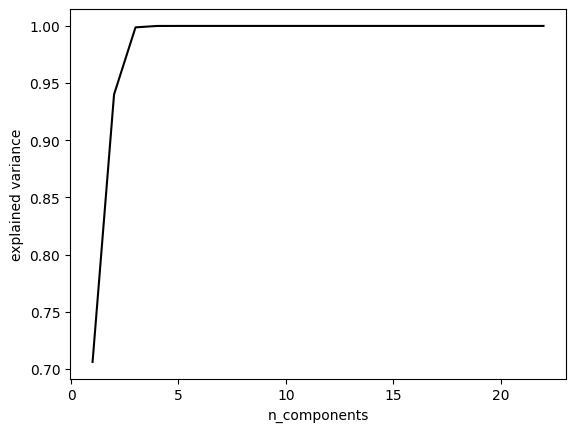

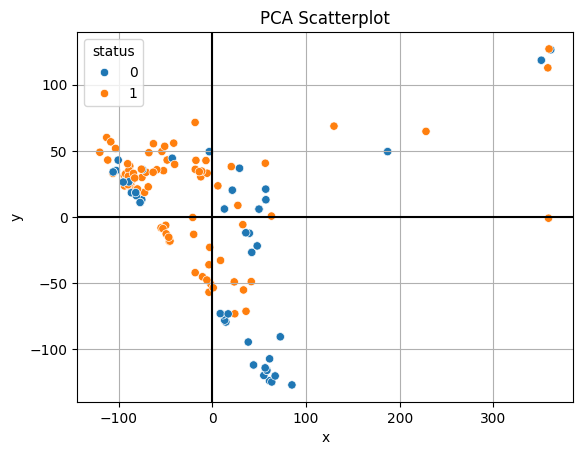

In [6]:
# use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA
import seaborn as sns

# test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(train_X) for n in n_components]

# plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_base = None
max_expvar_base = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_base:
        max_expvar_base = explained_variance
        best_comp_base = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


# create the model
pca = PCA(n_components = 2)

# fit and transform the model
transformed = pca.fit_transform(train_X)

# create a dataframe of the transformed data
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['status'] = train_y

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='status', data=df)

# make title
plt.title('PCA Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


### Experimenting with Hierarchical Clustering for Feature Selection - Baseline

#### HC on Baseline

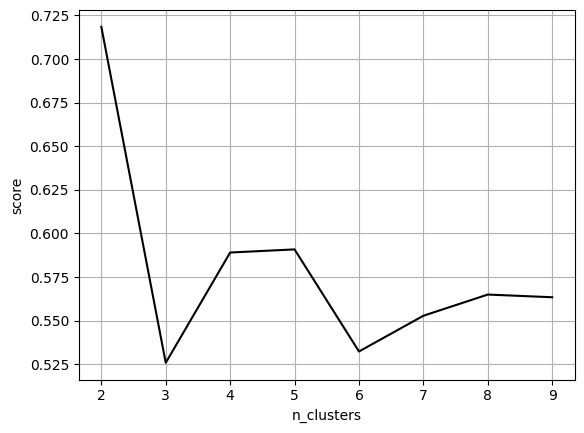

Cluster 2: Mean Silhouette Score: 0.71845370732248
Cluster 3: Mean Silhouette Score: 0.5257742364713679
Cluster 4: Mean Silhouette Score: 0.5890020016349363
Cluster 5: Mean Silhouette Score: 0.5907940902724355
Cluster 6: Mean Silhouette Score: 0.5322497432869496
Cluster 7: Mean Silhouette Score: 0.5527498218539727
Cluster 8: Mean Silhouette Score: 0.5648981056720065
Cluster 9: Mean Silhouette Score: 0.5633523338289078


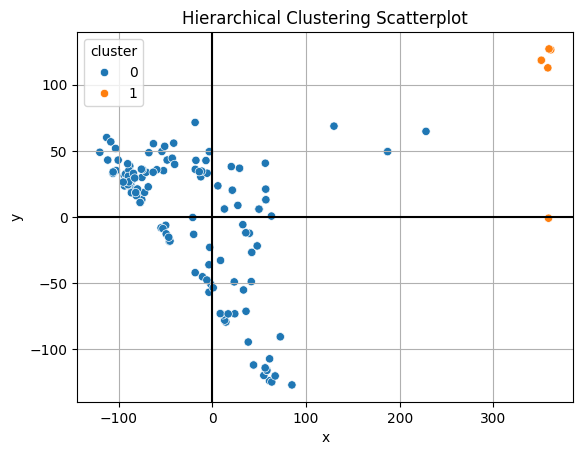

Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer 0.00013209310881739358


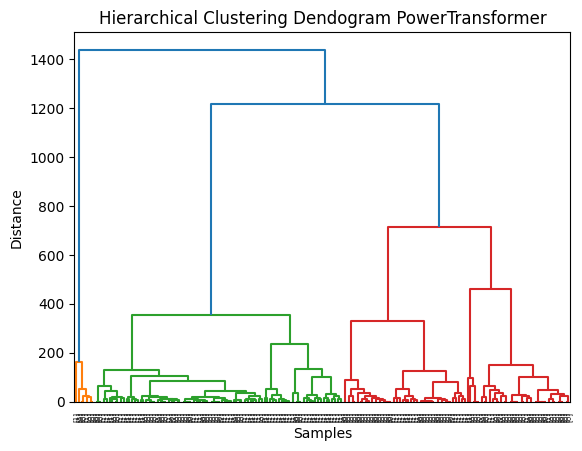

In [7]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(train_X) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(train_X, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(train_X, train_y)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(train_X, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarchical Clustering Dendogram PowerTransformer')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df['cluster']))

#### HC on Baseline and PCA reduced

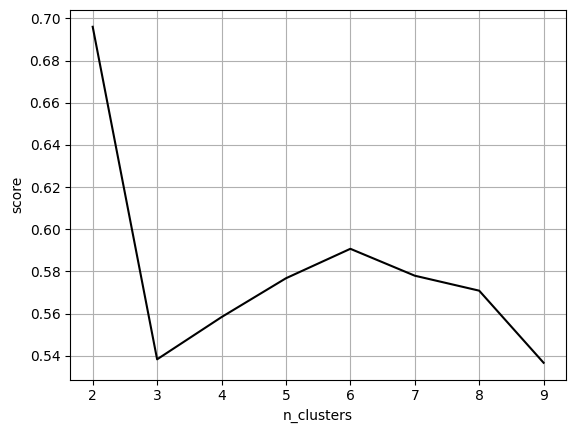

Cluster 2: Mean Silhouette Score: 0.696046828554951
Cluster 3: Mean Silhouette Score: 0.5382953215925974
Cluster 4: Mean Silhouette Score: 0.5583270369438637
Cluster 5: Mean Silhouette Score: 0.5767488748031124
Cluster 6: Mean Silhouette Score: 0.5907239472969451
Cluster 7: Mean Silhouette Score: 0.5779647276591232
Cluster 8: Mean Silhouette Score: 0.5708626780515604
Cluster 9: Mean Silhouette Score: 0.5366545779971529


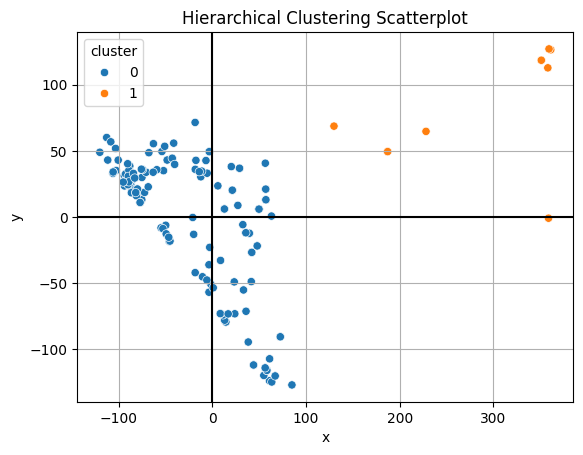

Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer 0.00045383374266874253


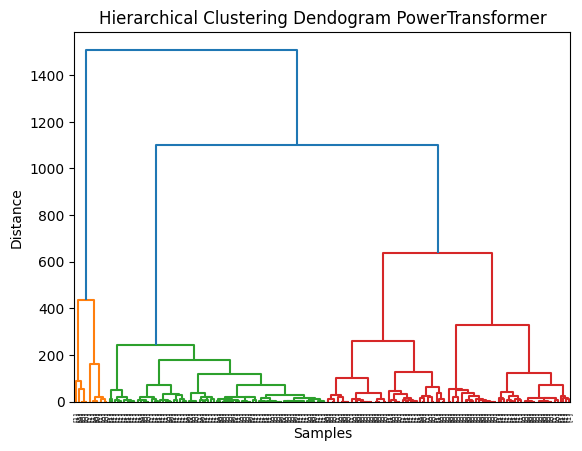

In [8]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(transformed) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(transformed, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(transformed, train_y)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(transformed, method='ward')
#Z = linkage(transformed, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarchical Clustering Dendogram PowerTransformer')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df['cluster']))

### Logistic Regression - Baseline

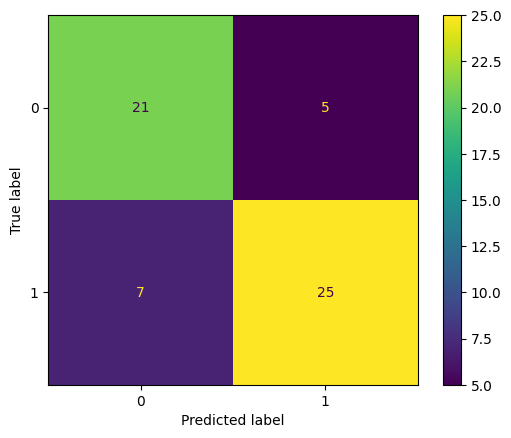

Accuracy:0.7931034482758621
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.83      0.78      0.81        32

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.80      0.79      0.79        58



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.get_params()

pca = PCA(n_components = best_comp_base)
transformed = pca.fit_transform(train_X)

log_model.fit(transformed, train_y.to_numpy().ravel())
transformed_test = pca.transform(test_X.values)

predictions_base = log_model.predict(transformed_test)

cm_base = confusion_matrix(test_y, predictions_base, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_base, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_base)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_base, labels=log_model.classes_))

### Decision Tree - Baseline

In [10]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()

pca = PCA(n_components = best_comp_base)

transformed_base = pca.fit_transform(train_X)

# fit the model
dt.fit(transformed_base, train_y)
transformed_test = pca.transform(test_X.values)

predict_pow_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_pow_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.8275862068965517


Depth:1 and Scores:0.6473856209150327
Depth:2 and Scores:0.8062091503267974
Depth:3 and Scores:0.7895424836601308
Depth:4 and Scores:0.8405228758169935
Depth:5 and Scores:0.868954248366013
Depth:6 and Scores:0.8297385620915032
Depth:7 and Scores:0.8297385620915033
Depth:8 and Scores:0.8297385620915032
Depth:9 and Scores:0.8297385620915032
Depth:10 and Scores:0.8297385620915032
Depth:11 and Scores:0.8297385620915032
Depth:12 and Scores:0.8297385620915032
Depth:13 and Scores:0.8297385620915032
Depth:14 and Scores:0.8297385620915032
Feature:1 and Scores:0.8346405228758169
Feature:2 and Scores:0.8862745098039216
Feature:3 and Scores:0.8522875816993464
Feature:4 and Scores:0.9143790849673203
Feature:5 and Scores:0.8869281045751635
Feature:6 and Scores:0.8973856209150327
Feature:7 and Scores:0.9313725490196079
Feature:8 and Scores:0.9032679738562092
Feature:9 and Scores:0.9316993464052287
Feature:10 and Scores:0.9150326797385621
Feature:11 and Scores:0.8813725490196077
Feature:12 and Scores:

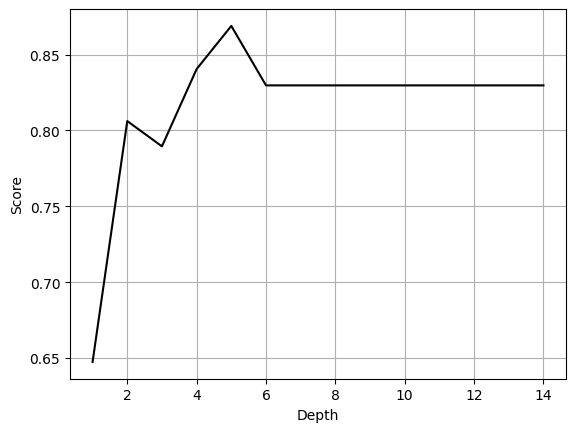

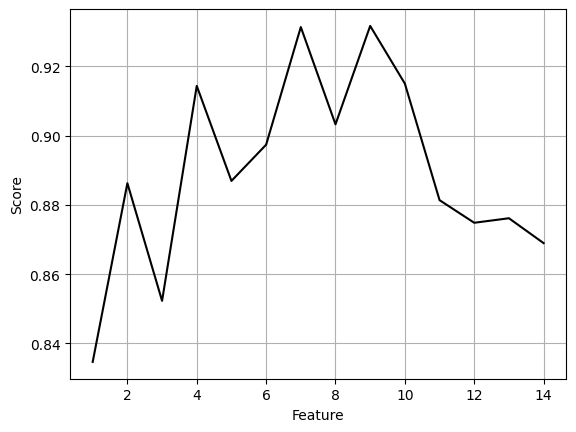

In [11]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_base, train_y, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_base, train_y, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

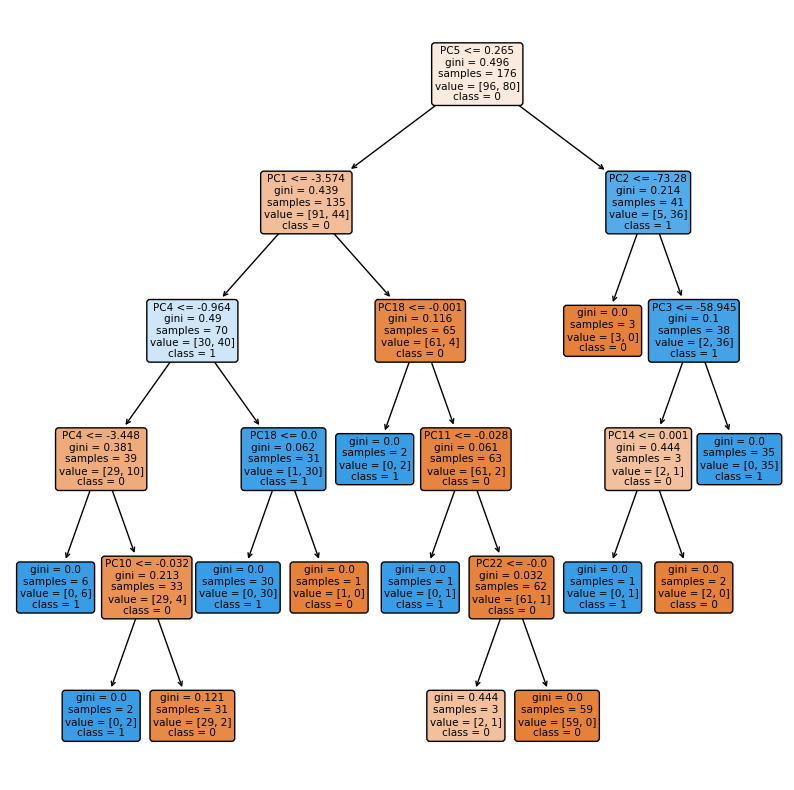

Best depth score: 5 and Best feature score: 9


In [12]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_base = pca.fit_transform(train_X)

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base, train_y)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

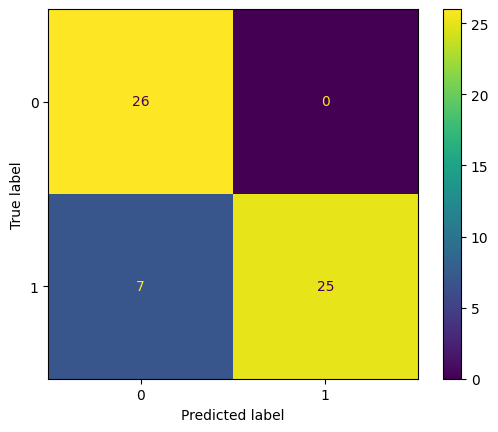

Accuracy of tuned model:0.8793103448275862


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base, train_y)

predict_test = dt.predict(transformed_test)

cm_base = confusion_matrix(test_y, predict_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_base, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_test)
print(f'Accuracy of tuned model:{accuracy}')

### Experimenting with SVM - Baseline Outliers Intact

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
train_y = train_y.to_numpy().ravel()

In [16]:
svc = SVC(random_state=42)

svc.fit(train_X,train_y)

accuracies = cross_val_score(svc,train_X,train_y,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.653015873015873
Test Score: 0.7586206896551724


#Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC(random_state=42))
])

#Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

#Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_X, train_y)

#Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

#Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

#Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

#Plot the decision boundary
plt.figure(figsize=(8, 6))

#Scatter plot of the training points
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.Paired)

#Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = train_X[:, 0:2]
#Obtain decision boundary values
best_model.fit(X, train_y)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

#Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, alpha=0.8)

#Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

## Experimenting with Baseline data Outliers Removed

### Expirmenting with PCA - Baseline Outliers Removed

Component 1: Explained Variance 0.6961681341890464
Component 2: Explained Variance 0.9365830622376095
Component 3: Explained Variance 0.9988325091361091
Component 4: Explained Variance 0.9999633194204633
Component 5: Explained Variance 0.9999935342969166
Component 6: Explained Variance 0.9999983325644197
Component 7: Explained Variance 0.9999990935959172
Component 8: Explained Variance 0.9999996239719925
Component 9: Explained Variance 0.9999998654997361
Component 10: Explained Variance 0.9999999508620044
Component 11: Explained Variance 0.9999999756091213
Component 12: Explained Variance 0.9999999963693776
Component 13: Explained Variance 0.9999999989437305
Component 14: Explained Variance 0.9999999995316676
Component 15: Explained Variance 0.9999999998111084
Component 16: Explained Variance 0.9999999999623614
Component 17: Explained Variance 0.9999999999822072
Component 18: Explained Variance 0.9999999999968061
Component 19: Explained Variance 0.9999999999999979
Component 20: Explain

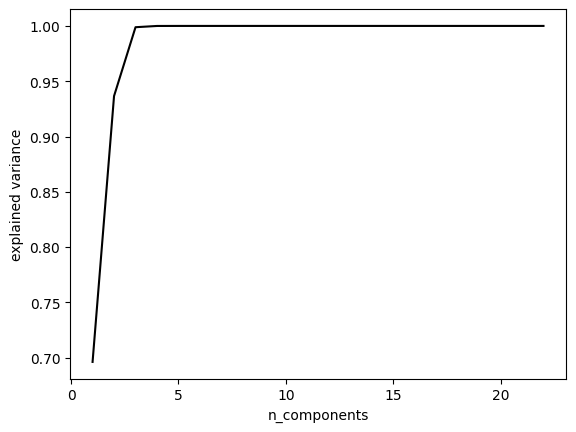

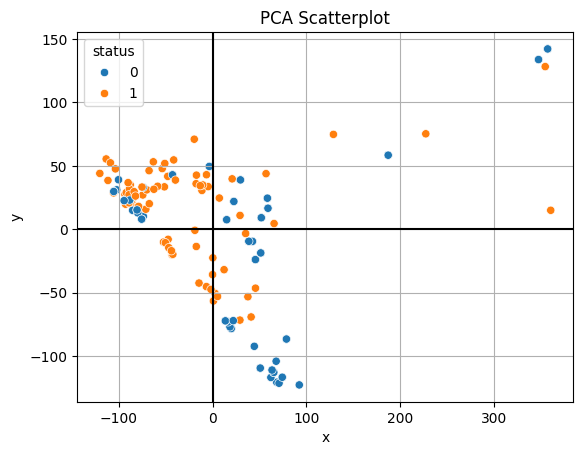

In [17]:
# use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA
import seaborn as sns

# test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers) for n in n_components]

# plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_base_no = None
max_expvar_base = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_base:
        max_expvar_base = explained_variance
        best_comp_base_no = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


# create the model
pca = PCA(n_components = 2)

# fit and transform the model
transformed = pca.fit_transform(X_train_no_outliers)

# create a dataframe of the transformed data
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['status'] = y_train_no_outliers

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='status', data=df)

# make title
plt.title('PCA Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


## Experimenting with Hierarchical Clustering - Baseline Outliers Removed

#### HC on Baseline Outliers Removed

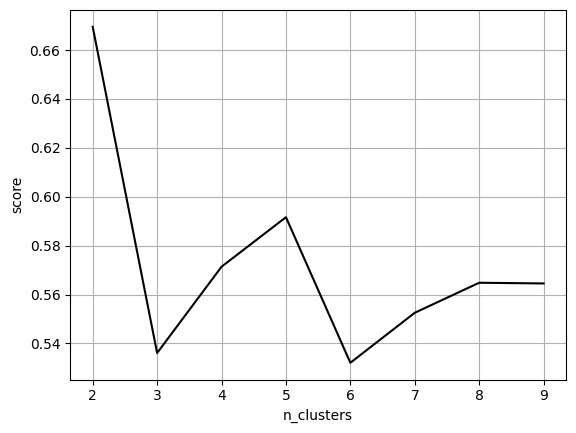

Cluster 2: Mean Silhouette Score: 0.6695186492449715
Cluster 3: Mean Silhouette Score: 0.5361061063007474
Cluster 4: Mean Silhouette Score: 0.5713858918160578
Cluster 5: Mean Silhouette Score: 0.5916500414043403
Cluster 6: Mean Silhouette Score: 0.532110591699508
Cluster 7: Mean Silhouette Score: 0.5525657575329423
Cluster 8: Mean Silhouette Score: 0.5648407187279818
Cluster 9: Mean Silhouette Score: 0.5645539741937283


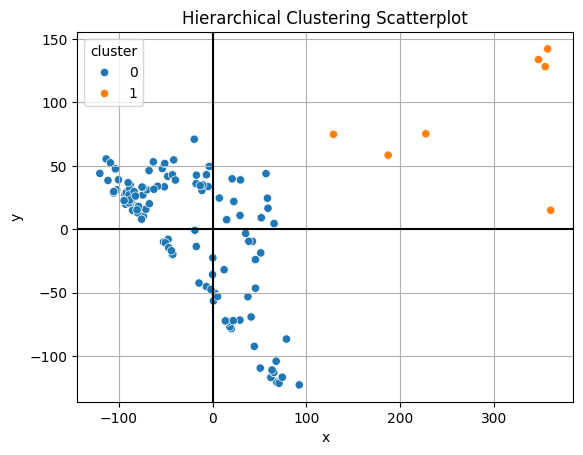

Hierarchical Clustering-Agglomerative NMI Score for Baseline 0.0021504285337424515


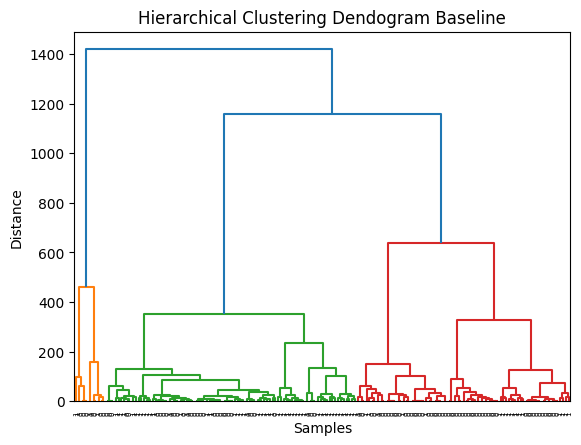

In [18]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(X_train_no_outliers)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(X_train_no_outliers, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=y_train_no_outliers)
plt.title('Hierarchical Clustering Dendogram Baseline')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for Baseline", 
      normalized_mutual_info_score(y_train_no_outliers, df['cluster']))

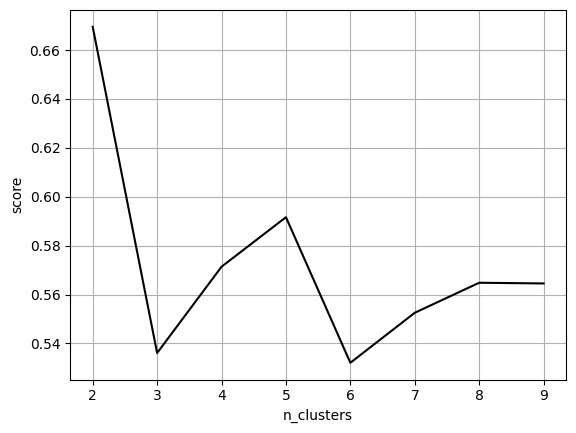

Cluster 2: Mean Silhouette Score: 0.6695186492449715
Cluster 3: Mean Silhouette Score: 0.5361061063007474
Cluster 4: Mean Silhouette Score: 0.5713858918160578
Cluster 5: Mean Silhouette Score: 0.5916500414043403
Cluster 6: Mean Silhouette Score: 0.532110591699508
Cluster 7: Mean Silhouette Score: 0.5525657575329423
Cluster 8: Mean Silhouette Score: 0.5648407187279818
Cluster 9: Mean Silhouette Score: 0.5645539741937283


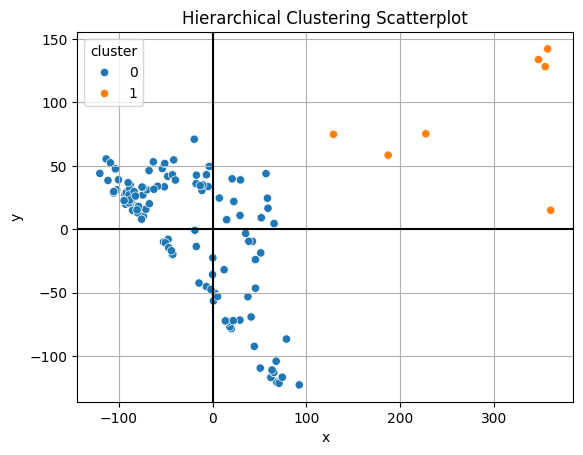

Hierarchical Clustering-Agglomerative NMI Score for Baseline 0.0021504285337424515


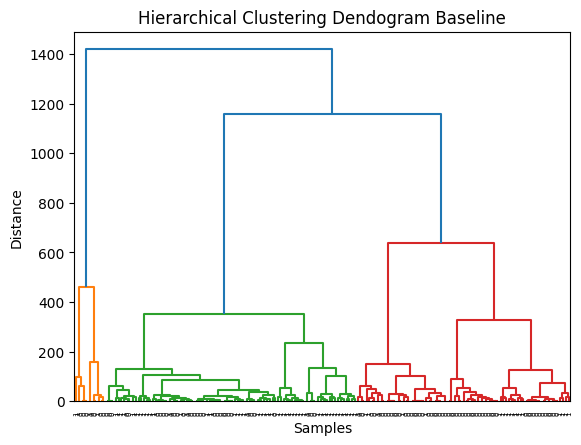

In [19]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(X_train_no_outliers)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(X_train_no_outliers, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=y_train_no_outliers)
plt.title('Hierarchical Clustering Dendogram Baseline')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for Baseline", 
      normalized_mutual_info_score(y_train_no_outliers, df['cluster']))

### Experimenting with Logistic Regression - Baseline Outliers Removed

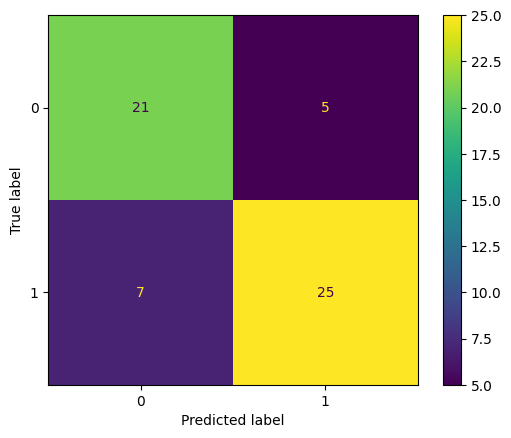

Accuracy:0.7931034482758621
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.83      0.78      0.81        32

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.80      0.79      0.79        58



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.get_params()

pca = PCA(n_components = best_comp_base_no)
transformed_base_no = pca.fit_transform(X_train_no_outliers)

log_model.fit(transformed_base_no, y_train_no_outliers)
transformed_test = pca.transform(test_X.values)

predictions_base_no = log_model.predict(transformed_test)

cm_base_no = confusion_matrix(test_y, predictions_base_no, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_base_no, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_base_no)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_base_no, labels=log_model.classes_))

### Decision Tree - Baseline Outliers Removed

In [21]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()

pca = PCA(n_components = best_comp_base_no)

transformed_base_no = pca.fit_transform(X_train_no_outliers)

# fit the model
dt.fit(transformed_base_no, y_train_no_outliers)
transformed_test = pca.transform(test_X.values)

predict_base_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_base_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.8620689655172413


Depth:1 and Scores:0.6712418300653595
Depth:2 and Scores:0.7862745098039217
Depth:3 and Scores:0.815359477124183
Depth:4 and Scores:0.8496732026143791
Depth:5 and Scores:0.8617647058823529
Depth:6 and Scores:0.85
Depth:7 and Scores:0.8617647058823529
Depth:8 and Scores:0.8617647058823529
Depth:9 and Scores:0.8617647058823529
Depth:10 and Scores:0.8617647058823529
Depth:11 and Scores:0.8617647058823529
Depth:12 and Scores:0.8617647058823529
Depth:13 and Scores:0.8617647058823529
Depth:14 and Scores:0.8617647058823529
Feature:1 and Scores:0.8098039215686275
Feature:2 and Scores:0.8686274509803921
Feature:3 and Scores:0.8846405228758171
Feature:4 and Scores:0.8790849673202615
Feature:5 and Scores:0.9019607843137255
Feature:6 and Scores:0.8859477124183007
Feature:7 and Scores:0.8901960784313726
Feature:8 and Scores:0.907516339869281
Feature:9 and Scores:0.8967320261437909
Feature:10 and Scores:0.95359477124183
Feature:11 and Scores:0.8905228758169933
Feature:12 and Scores:0.873529411764705

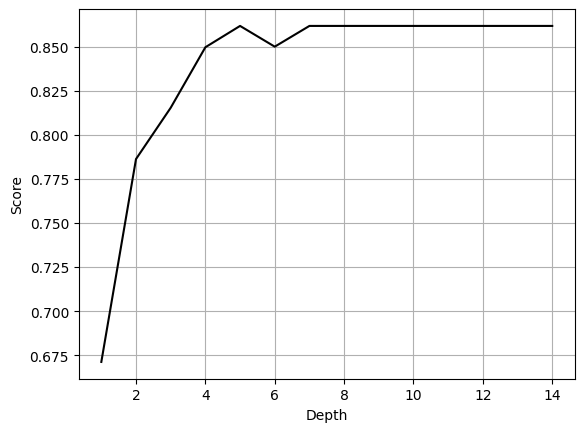

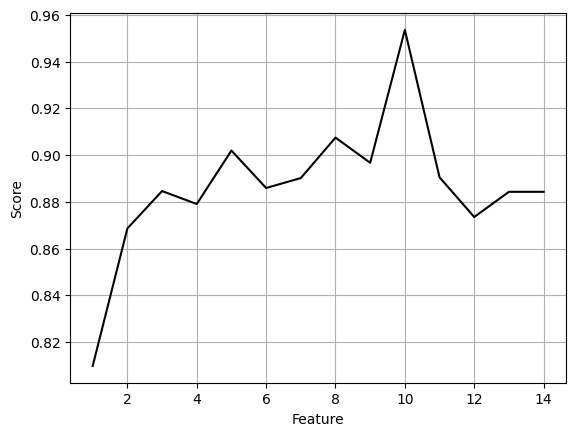

In [22]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_base_no, y_train_no_outliers, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_base_no, y_train_no_outliers, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

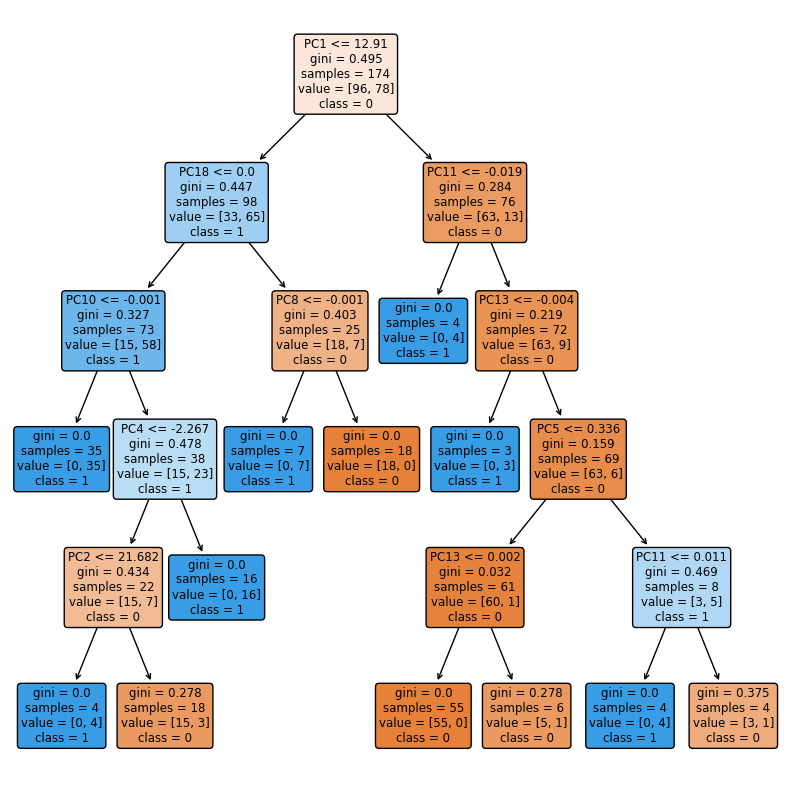

Best depth score: 5 and Best feature score: 10


In [23]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_base_no = pca.fit_transform(X_train_no_outliers)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base_no, y_train_no_outliers)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

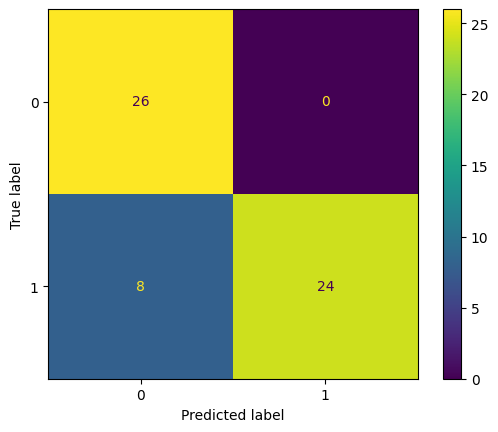

Accuracy of tuned model:0.8620689655172413


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base_no, y_train_no_outliers)

predict_test = dt.predict(transformed_test)

cm_base_no = confusion_matrix(test_y, predict_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_base_no, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_test)
print(f'Accuracy of tuned model:{accuracy}')

### SVM - Baseline Outliers Removed

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [26]:
y_train_no_outliers = y_train_no_outliers.ravel()

In [27]:
svc = SVC(random_state=42)

svc.fit(X_train_no_outliers,y_train_no_outliers)

accuracies = cross_val_score(svc,X_train_no_outliers,y_train_no_outliers,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.6727731092436975
Test Score: 0.7586206896551724


#Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC(random_state=42))
])

#Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

#Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_no_outliers, y_train_no_outliers)

#Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

#Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

#Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

#Plot the decision boundary
plt.figure(figsize=(8, 6))

#Scatter plot of the training points
plt.scatter(X_train_no_outliers[:, 0], X_train_no_outliers[:, 1], c=y_train_no_outliers, cmap=plt.cm.Paired)

#Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X_train_no_outliers[:, 0].min() - 1, X_train_no_outliers[:, 0].max() + 1
y_min, y_max = X_train_no_outliers[:, 1].min() - 1, X_train_no_outliers[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = X_train_no_outliers[:, 0:2]
#Obtain decision boundary values
best_model.fit(X_train_no_outliers, y_train_no_outliers)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

#Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, alpha=0.8)

#Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()